# Практическая работа №1: Краевая задача для уравнения II-го порядка

Выполнил студент гр. 9381 Шахин Никита, вариант 17.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения

Задача Коши подразумевает поиск частного решения уравнения $y = \varphi(x)$ из числа общих, удовлетворяющих некоторым условиям. Общий вид задачи Коши:
    $\begin{cases}
      f(x, y, y', y'',...,y^{(n)} = 0\\
       y(x_0) = y_0\\
      y'(x_0) = y_1\\
       y''(x_0) = y_2\\
       ...\\
       y^{(n-1)}(x_0) = y_{n-1}
    \end{cases}$

## Постановка задачи

Дано дифференциальное уравнение: 

$y'' = f(x,y), a < x < b$  (1)

и граничные условия

$y(a) = y_a$, $y(b) = y_b$  (2)

Требуется найти решение задачи (1)-(2) и построить его график.

Рассмотрим задачу Коши для уравнения (1) с начальными условиями

$y(a) = y_a$, $y'(a) = h$  (3)

План решения основан на многократном решении задачи Коши (1), (3). Значение решения задачи Коши при 𝑥 = 𝑏 является функцией от ℎ. 
Задача сводится к отысканию такого значения переменной ℎ, при котором выполнено условие на правом конце отрезка, т.е. должно выполняться

$y(b, h) = y_b$ (4)

Это уравнение с одним неизвестным ℎ.
Для его решения можно применить стандартный метод половинного деления.

## Выполнение работы

$ f(x, y) = sin(x + y^{3}) $ 

$ y'' = sin(x + y^{3}), \quad a < x < b $

$ a = 0, b = 2 $

$ y_{a} = 1, y_{b} = 3 $

$ y(0) = 1, \quad y(2) = 3 $

Задача Коши:

$\begin{cases}
      y'' - sin(x + y^{3}) = 0 \\
      y(0) = 1 \\
      y'(0) = h
    \end{cases}$
    
$\begin{cases}
      y' = g\\
      g' = sin(x + y^{3}) \\
    \end{cases}$    
    
**Задаем число $ h_{0}$, решаем задачу Коши. Вычисляем $ y(b, h_{0}) $**  

$h_{0} = 1.5 $

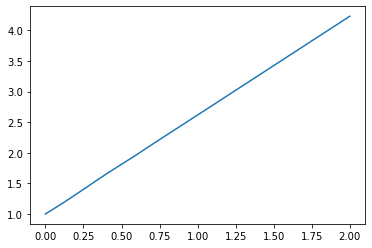

y(b, h0) = 4.23248157646872 h =  1.5


In [41]:
from scipy import integrate 
import numpy as np
import matplotlib.pyplot as plt
import math


def F(Y, t):
    return [Y[1], math.sin(t + Y[0]**3)]

h = 1.5
solution = integrate.odeint(F, [1, h], np.arange(0, 2, 0.001))
p = plt.plot(np.arange(0, 2, 0.001), solution[:, 0])
plt.show()
print("y(b, h0) =", solution[-1, 0], "h = ", h)

$y(b, h_{0}) = 4.23248157646872$

$y(b, h_{0}) > y_{b}$

Выберем шаг $\Delta h = -0.1$. Решаем задачу Коши, пока $y(b, h_{1}) > y_{b} \quad h_{1} = h + \Delta h$

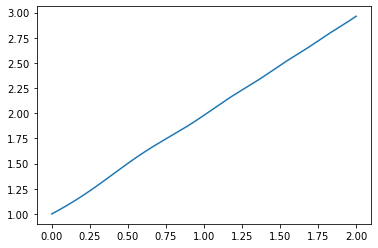

y(b, h1) = 2.963194613442078 h1 =  0.7999999999999997


In [42]:
dh = -0.1
h_u = h
y_u = solution[-1, 0]
while solution[-1, 0] > 3:
    h = h + dh
    solution = integrate.odeint(F, [1, h], np.arange(0, 2, 0.001))
    
y_d = solution[-1, 0]
h_l = h
p = plt.plot(np.arange(0, 2, 0.001), solution[:, 0])
plt.show()
print("y(b, h1) =", y_d, "h1 = ", h)

Получили, что $ h \in [0.8, 1.5]$

Методом половинного деления найдём $ h $, тайой что $|y(b, h_{0}) - y(b, h_{1})| < 0.001$

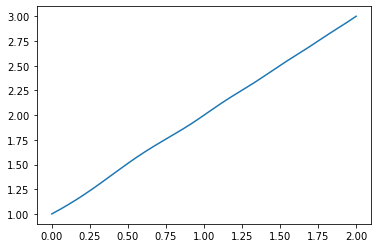

y(b, h) = 3.000404588284135 h =  0.8208496093749997


In [43]:
mid = 0
while abs(y_u - y_d) >= 0.001:
    dh = (h_u - h_l)/2
    h = h_l + dh
    solution = integrate.odeint(F, [1,h], np.arange(0, 2, 0.001))
    if(solution[-1,0] > 3):
        h_u = h
        y_u = solution[-1,0]
    else:
        h_l = h
        y_d = solution[-1,0]

p = plt.plot(np.arange(0, 2, 0.001), solution[:, 0])
plt.show()
print("y(b, h) =", solution[-1,0], "h = ", h)        

## Выводы

Была решена краевая задача для уравнения II-го порядка путём многократного решения задачи Коши. Было найдено значение $ h = 0.8208496093749997$ 